In [11]:
# !!!!!!!!!!!!!!!!! RUN ON DEEPUNET KERNEL FOR REQUIRED LIBRARIES !!!!!!!!!!!!!!!!!!!!

import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from plotingfun import *
from helper_functions import *
# import optuna
# from optuna.integration import TFKerasPruningCallback
# from optuna.trial import TrialState
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import xgboost as xgb
from catboost import CatBoostClassifier
import seaborn as sns

In [12]:
file = "F:\\Group 19\\newApproachMATLAB\\features\\four_channels\\features.csv"
# file = "D:\\all_features.csv"

data = pd.read_csv(file, header=None)

In [13]:
data

,0,1,2,3,4,5,6,7,8,9,...,462,463,464,465,466,467,468,469,470,471
0,11.838384,3.687221,213.713734,95.093233,5223.568948,0.085301,0.129810,0.159897,0.133512,0.491479,...,0.028530,-0.068037,0.022072,-0.030704,-0.048373,0.025466,-0.025351,-0.056618,-0.001922,-0.000657
1,11.873360,3.210082,206.750686,93.774949,5057.975587,0.091060,0.132019,0.162783,0.126157,0.487981,...,-0.001393,-0.031062,0.002729,-0.002707,0.063870,0.020179,0.075819,-0.002547,0.086650,-0.009901
2,11.864793,2.494369,206.170497,93.468677,5341.692649,0.093691,0.136101,0.162830,0.115294,0.492085,...,0.036117,0.064203,0.016455,0.107524,0.025673,-0.023887,-0.035143,0.028481,0.014399,-0.089909
3,11.861838,1.154725,213.061185,95.159899,6167.674164,0.093310,0.140412,0.159958,0.106273,0.500047,...,0.072721,-0.023822,0.043558,0.031559,0.066844,-0.003058,0.037149,-0.037936,0.093463,-0.037793
4,11.811886,0.548218,220.890395,97.769892,7153.931355,0.095280,0.141574,0.157143,0.103782,0.502221,...,0.011641,-0.017267,-0.033110,0.004993,-0.065029,-0.045097,-0.034140,-0.021747,0.035709,0.014168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919241,9.126265,-6.747966,112.640620,88.297985,132.365813,0.122106,0.131850,0.136733,0.133890,0.475422,...,-0.164847,0.068897,-0.016020,0.017231,-0.048754,0.009488,-0.007705,0.000256,-0.050827,0.036063
919242,9.202971,-6.231649,98.297751,88.621311,111.474033,0.123212,0.129555,0.137837,0.135352,0.474044,...,0.037050,0.032180,-0.011895,-0.020704,-0.045991,-0.090781,0.001906,-0.069776,-0.049738,0.034317
919243,9.127710,-6.152886,99.144110,88.588029,91.065046,0.123646,0.127746,0.139256,0.135016,0.474336,...,0.093099,0.166728,-0.041358,0.186003,-0.072199,0.025414,0.005476,-0.001281,0.089995,-0.021268
919244,9.036572,-6.139675,100.274104,88.686415,73.953992,0.123435,0.126995,0.140578,0.131824,0.477168,...,-0.055330,-0.164801,-0.075886,0.033956,-0.008692,0.011696,0.053695,-0.048150,0.130825,0.072898


In [14]:
# Take the first 10% of your data
num_samples = int(len(data) * 0.1)
data_sample = data.iloc[:num_samples]

# Extract the features and target variable from the sample
X = data_sample
y = pd.read_csv("F:\\Group 19\\newApproachMATLAB\\features\\four_channels\\labels.csv",header=None)

# Change labels from 1-index based to 0-index based (reason: features imported from matlab)
y=y-1

In [15]:
X

,0,1,2,3,4,5,6,7,8,9,...,462,463,464,465,466,467,468,469,470,471
0,11.838384,3.687221,213.713734,95.093233,5223.568948,0.085301,0.129810,0.159897,0.133512,0.491479,...,0.028530,-0.068037,0.022072,-0.030704,-0.048373,0.025466,-0.025351,-0.056618,-0.001922,-0.000657
1,11.873360,3.210082,206.750686,93.774949,5057.975587,0.091060,0.132019,0.162783,0.126157,0.487981,...,-0.001393,-0.031062,0.002729,-0.002707,0.063870,0.020179,0.075819,-0.002547,0.086650,-0.009901
2,11.864793,2.494369,206.170497,93.468677,5341.692649,0.093691,0.136101,0.162830,0.115294,0.492085,...,0.036117,0.064203,0.016455,0.107524,0.025673,-0.023887,-0.035143,0.028481,0.014399,-0.089909
3,11.861838,1.154725,213.061185,95.159899,6167.674164,0.093310,0.140412,0.159958,0.106273,0.500047,...,0.072721,-0.023822,0.043558,0.031559,0.066844,-0.003058,0.037149,-0.037936,0.093463,-0.037793
4,11.811886,0.548218,220.890395,97.769892,7153.931355,0.095280,0.141574,0.157143,0.103782,0.502221,...,0.011641,-0.017267,-0.033110,0.004993,-0.065029,-0.045097,-0.034140,-0.021747,0.035709,0.014168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91919,11.553139,-8.479678,126.370172,113.838123,68.752137,0.109059,0.134686,0.155109,0.125759,0.475387,...,0.021957,0.012332,0.010686,-0.004662,-0.040714,0.088123,-0.023203,0.117048,0.025428,0.016223
91920,11.518824,-8.683919,129.145855,115.481838,71.597440,0.097823,0.141854,0.168229,0.125104,0.466989,...,0.015701,0.008580,0.022564,0.016489,-0.017834,-0.011637,0.042813,-0.002833,0.033960,-0.010805
91921,11.401198,-8.548016,125.040557,115.847612,73.464497,0.097723,0.139855,0.168535,0.125276,0.468611,...,-0.007621,-0.022280,0.004916,0.029253,0.040403,0.057596,-0.010405,-0.003238,0.053487,-0.026137
91922,11.327050,-8.325434,119.603044,116.025626,72.862475,0.105041,0.134606,0.162074,0.122315,0.475964,...,-0.025350,0.011712,0.006615,0.043150,0.041957,0.052378,-0.035227,0.016305,-0.017713,0.052315


In [16]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0,inplace=True)

C:\Users\defeo\AppData\Local\Temp\ipykernel_13152\804479191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\defeo\AppData\Local\Temp\ipykernel_13152\804479191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0,inplace=True)


#### XGBoost

In [17]:
accuracy_scores = []
f1_scores_list = []
recall_scores = []
precision_scores_list = []

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=42)

X_np = X.values
y_np = y.values

for train_index, test_index in tqdm(crossvalidation.split(X)):
    X_train, X_test = X_np[train_index], X_np[test_index]
    y_train, y_test = y_np[train_index], y_np[test_index]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    modelxgboost = xgb.XGBClassifier()
    modelxgboost.fit(X_train_scaled, y_train)
    y_pred = modelxgboost.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    accuracy_scores.append(accuracy)
    
    f1 = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
    f1_scores_list.append(f1)
    
    recall = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
    recall_scores.append(recall)
    
    precision = precision_score(y_true=y_test, y_pred=y_pred, average='macro')
    precision_scores_list.append(precision)

mean_accuracy = np.mean(accuracy_scores)
mean_f1 = np.mean(f1_scores_list)
mean_recall = np.mean(recall_scores)
mean_precision = np.mean(precision_scores_list)

xgboost_score = {"Accuracy": mean_accuracy, "F1-Score": mean_f1, "Recall": mean_recall, "Precision": mean_precision}


5it [31:33, 378.64s/it]


In [18]:
xgboost_score

{'Accuracy': 0.8088312287730306,
 'F1-Score': 0.7491882115190499,
 'Recall': 0.7192782016782944,
 'Precision': 0.8097592967321555}

#### CatBoost

In [19]:
accuracy_scores = []
f1_scores_list = []
recall_scores = []
precision_scores_list = []

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in tqdm(crossvalidation.split(X)):
    X_train, X_test = X_np[train_index], X_np[test_index]
    y_train, y_test = y_np[train_index], y_np[test_index]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    modelcatboost = CatBoostClassifier(verbose=1)
    modelcatboost.fit(X_train_scaled, y_train)
    y_pred = modelcatboost.predict(X_test_scaled)
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    accuracy_scores.append(accuracy)
    f1 = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
    f1_scores_list.append(f1)
    recall = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
    recall_scores.append(recall)
    precision = precision_score(y_true=y_test, y_pred=y_pred, average='macro')
    precision_scores_list.append(precision)

mean_accuracy = np.mean(accuracy_scores)
mean_f1 = np.mean(f1_scores_list)
mean_recall = np.mean(recall_scores)
mean_precision = np.mean(precision_scores_list)

catboost_score = {"Accuracy": mean_accuracy, "F1-Score": mean_f1, "Recall": mean_recall, "Precision": mean_precision}


0it [00:00, ?it/s]

Learning rate set to 0.098518
0:	learn: 1.6573415	total: 395ms	remaining: 6m 34s
1:	learn: 1.5583956	total: 645ms	remaining: 5m 21s
2:	learn: 1.4814398	total: 886ms	remaining: 4m 54s
3:	learn: 1.4168210	total: 1.13s	remaining: 4m 42s
4:	learn: 1.3648372	total: 1.38s	remaining: 4m 34s
5:	learn: 1.3172309	total: 1.63s	remaining: 4m 30s
6:	learn: 1.2807221	total: 1.89s	remaining: 4m 28s
7:	learn: 1.2460343	total: 2.14s	remaining: 4m 25s
8:	learn: 1.2156731	total: 2.39s	remaining: 4m 23s
9:	learn: 1.1925892	total: 2.6s	remaining: 4m 17s
10:	learn: 1.1676612	total: 2.84s	remaining: 4m 15s
11:	learn: 1.1458950	total: 3.09s	remaining: 4m 14s
12:	learn: 1.1266511	total: 3.34s	remaining: 4m 13s
13:	learn: 1.1101317	total: 3.59s	remaining: 4m 12s
14:	learn: 1.0931521	total: 3.84s	remaining: 4m 12s
15:	learn: 1.0782216	total: 4.09s	remaining: 4m 11s
16:	learn: 1.0623059	total: 4.35s	remaining: 4m 11s
17:	learn: 1.0500932	total: 4.59s	remaining: 4m 10s
18:	learn: 1.0378230	total: 4.85s	remaining: 

1it [03:56, 236.35s/it]

Learning rate set to 0.098518
0:	learn: 1.6577398	total: 279ms	remaining: 4m 38s
1:	learn: 1.5575715	total: 541ms	remaining: 4m 29s
2:	learn: 1.4775633	total: 819ms	remaining: 4m 32s
3:	learn: 1.4157744	total: 1.07s	remaining: 4m 26s
4:	learn: 1.3638186	total: 1.32s	remaining: 4m 22s
5:	learn: 1.3195391	total: 1.61s	remaining: 4m 26s
6:	learn: 1.2820672	total: 1.86s	remaining: 4m 23s
7:	learn: 1.2497900	total: 2.11s	remaining: 4m 21s
8:	learn: 1.2186178	total: 2.38s	remaining: 4m 22s
9:	learn: 1.1922864	total: 2.64s	remaining: 4m 21s
10:	learn: 1.1683476	total: 2.89s	remaining: 4m 19s
11:	learn: 1.1486394	total: 3.13s	remaining: 4m 18s
12:	learn: 1.1286163	total: 3.4s	remaining: 4m 18s
13:	learn: 1.1116461	total: 3.66s	remaining: 4m 17s
14:	learn: 1.0954794	total: 3.92s	remaining: 4m 17s
15:	learn: 1.0817852	total: 4.19s	remaining: 4m 17s
16:	learn: 1.0677210	total: 4.44s	remaining: 4m 16s
17:	learn: 1.0550088	total: 4.7s	remaining: 4m 16s
18:	learn: 1.0423470	total: 4.96s	remaining: 4

2it [08:06, 244.58s/it]

Learning rate set to 0.098518
0:	learn: 1.6562153	total: 277ms	remaining: 4m 36s
1:	learn: 1.5595051	total: 540ms	remaining: 4m 29s
2:	learn: 1.4805021	total: 797ms	remaining: 4m 24s
3:	learn: 1.4154751	total: 1.06s	remaining: 4m 23s
4:	learn: 1.3630047	total: 1.33s	remaining: 4m 24s
5:	learn: 1.3190004	total: 1.59s	remaining: 4m 23s
6:	learn: 1.2831274	total: 1.84s	remaining: 4m 20s
7:	learn: 1.2483385	total: 2.1s	remaining: 4m 20s
8:	learn: 1.2197717	total: 2.37s	remaining: 4m 20s
9:	learn: 1.1930095	total: 2.61s	remaining: 4m 18s
10:	learn: 1.1691449	total: 2.86s	remaining: 4m 16s
11:	learn: 1.1477670	total: 3.12s	remaining: 4m 17s
12:	learn: 1.1273244	total: 3.38s	remaining: 4m 16s
13:	learn: 1.1108448	total: 3.63s	remaining: 4m 16s
14:	learn: 1.0943729	total: 3.88s	remaining: 4m 14s
15:	learn: 1.0795069	total: 4.13s	remaining: 4m 13s
16:	learn: 1.0653003	total: 4.37s	remaining: 4m 12s
17:	learn: 1.0524761	total: 4.6s	remaining: 4m 11s
18:	learn: 1.0416477	total: 4.86s	remaining: 4

3it [12:17, 247.36s/it]

Learning rate set to 0.098518
0:	learn: 1.6564464	total: 290ms	remaining: 4m 49s
1:	learn: 1.5574354	total: 539ms	remaining: 4m 28s
2:	learn: 1.4786633	total: 796ms	remaining: 4m 24s
3:	learn: 1.4151370	total: 1.07s	remaining: 4m 27s
4:	learn: 1.3641356	total: 1.34s	remaining: 4m 27s
5:	learn: 1.3205221	total: 1.61s	remaining: 4m 27s
6:	learn: 1.2843685	total: 1.86s	remaining: 4m 23s
7:	learn: 1.2491890	total: 2.11s	remaining: 4m 21s
8:	learn: 1.2176446	total: 2.39s	remaining: 4m 22s
9:	learn: 1.1914516	total: 2.64s	remaining: 4m 21s
10:	learn: 1.1694696	total: 2.88s	remaining: 4m 19s
11:	learn: 1.1476042	total: 3.15s	remaining: 4m 19s
12:	learn: 1.1286930	total: 3.42s	remaining: 4m 19s
13:	learn: 1.1117324	total: 3.68s	remaining: 4m 19s
14:	learn: 1.0947539	total: 3.94s	remaining: 4m 18s
15:	learn: 1.0797111	total: 4.18s	remaining: 4m 17s
16:	learn: 1.0660373	total: 4.42s	remaining: 4m 15s
17:	learn: 1.0529363	total: 4.68s	remaining: 4m 15s
18:	learn: 1.0426208	total: 4.94s	remaining:

4it [16:29, 249.30s/it]

Learning rate set to 0.098518
0:	learn: 1.6562268	total: 277ms	remaining: 4m 37s
1:	learn: 1.5560027	total: 540ms	remaining: 4m 29s
2:	learn: 1.4799541	total: 795ms	remaining: 4m 24s
3:	learn: 1.4153581	total: 1.04s	remaining: 4m 19s
4:	learn: 1.3619005	total: 1.3s	remaining: 4m 19s
5:	learn: 1.3163342	total: 1.57s	remaining: 4m 20s
6:	learn: 1.2817459	total: 1.82s	remaining: 4m 18s
7:	learn: 1.2491333	total: 2.06s	remaining: 4m 15s
8:	learn: 1.2185636	total: 2.31s	remaining: 4m 14s
9:	learn: 1.1938291	total: 2.56s	remaining: 4m 13s
10:	learn: 1.1699303	total: 2.81s	remaining: 4m 12s
11:	learn: 1.1469092	total: 3.06s	remaining: 4m 11s
12:	learn: 1.1289817	total: 3.31s	remaining: 4m 11s
13:	learn: 1.1116541	total: 3.55s	remaining: 4m 10s
14:	learn: 1.0954327	total: 3.81s	remaining: 4m 10s
15:	learn: 1.0813624	total: 4.07s	remaining: 4m 10s
16:	learn: 1.0674603	total: 4.32s	remaining: 4m 9s
17:	learn: 1.0553730	total: 4.57s	remaining: 4m 9s
18:	learn: 1.0426821	total: 4.82s	remaining: 4m

5it [20:36, 247.35s/it]


In [20]:
catboost_score

{'Accuracy': 0.8125299642143089,
 'F1-Score': 0.7533041570002548,
 'Recall': 0.7271296203869388,
 'Precision': 0.8016678137998999}

#### SVM

In [21]:
accuracy_scores = []
f1_scores_list = []
recall_scores = []
precision_scores_list = []

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in tqdm(crossvalidation.split(X)):
    X_train, X_test = X_np[train_index], X_np[test_index]
    y_train, y_test = y_np[train_index], y_np[test_index]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    modelSVC= SVC(verbose=True)
    modelSVC.fit(X_train_scaled, y_train)
    y_pred = modelSVC.predict(X_test_scaled)
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    accuracy_scores.append(accuracy)
    f1 = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
    f1_scores_list.append(f1)
    recall = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
    recall_scores.append(recall)
    precision = precision_score(y_true=y_test, y_pred=y_pred, average='macro')
    precision_scores_list.append(precision)

mean_accuracy = np.mean(accuracy_scores)
mean_f1 = np.mean(f1_scores_list)
mean_recall = np.mean(recall_scores)
mean_precision = np.mean(precision_scores_list)

SVM_score = {"Accuracy": mean_accuracy, "F1-Score": mean_f1, "Recall": mean_recall, "Precision": mean_precision}

0it [00:00, ?it/s]c:\Users\defeo\anaconda3\envs\deepunet\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

1it [49:21, 2961.49s/it]c:\Users\defeo\anaconda3\envs\deepunet\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

2it [1:37:40, 2924.96s/it]c:\Users\defeo\anaconda3\envs\deepunet\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

3it [2:25:57, 2912.22s/it]c:\Users\defeo\anaconda3\envs\deepunet\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

4it [3:15:47, 2942.90s/it]c:\Users\defeo\anaconda3\envs\deepunet\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

5it [4:03:38, 2923.65s/it]


#### KNN

In [22]:
accuracy_scores = []
f1_scores_list = []
recall_scores = []
precision_scores_list = []

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in tqdm(crossvalidation.split(X)):
    X_train, X_test = X_np[train_index], X_np[test_index]
    y_train, y_test = y_np[train_index], y_np[test_index]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    modelKn= make_pipeline(StandardScaler(),
                   KNeighborsClassifier(n_neighbors=20))
    modelKn.fit(X_train_scaled, y_train)
    y_pred = modelKn.predict(X_test_scaled)
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    accuracy_scores.append(accuracy)
    f1 = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
    f1_scores_list.append(f1)
    recall = recall_score(y_true=y_test, y_pred=y_pred, average='macro')
    recall_scores.append(recall)
    precision = precision_score(y_true=y_test, y_pred=y_pred, average='macro')
    precision_scores_list.append(precision)

mean_accuracy = np.mean(accuracy_scores)
mean_f1 = np.mean(f1_scores_list)
mean_recall = np.mean(recall_scores)
mean_precision = np.mean(precision_scores_list)

Kn_score = {"Accuracy": mean_accuracy, "F1-Score": mean_f1, "Recall": mean_recall, "Precision": mean_precision}

0it [00:00, ?it/s]c:\Users\defeo\anaconda3\envs\deepunet\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
1it [00:06,  6.76s/it]c:\Users\defeo\anaconda3\envs\deepunet\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
2it [00:13,  6.69s/it]c:\Users\defeo\anaconda3\envs\deepunet\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
3it [00:19,  6.57s/it]c:\Users\defeo\anaconda3\envs\deepunet\lib\site-packages\sklearn\neighbors\_cla

------------------------------------------------------------

In [23]:
score={"XGBOOST Model":xgboost_score,"CATBOOST Model":catboost_score,"SVM Model":SVM_score,"KNeighborsClassifier Model":Kn_score}

In [24]:
score=pd.DataFrame.from_dict(score, orient='index')

In [25]:
highlighted_score = score.style.highlight_max(color="blue").highlight_min(color="red")
highlighted_score.set_caption("Lowest values in red, highest values in blue")
display(highlighted_score)

highlighted_df = score.style.highlight_max(color='blue').highlight_min(color='red')
cm = sns.diverging_palette(10, 220, sep=80, n=7, as_cmap=True)
highlighted_df.background_gradient(cmap=cm).set_caption("Lowest values in red, highest values in blue")


,Accuracy,F1-Score,Recall,Precision
XGBOOST Model,0.808831,0.749188,0.719278,0.809759
CATBOOST Model,0.812530,0.753304,0.727130,0.801668
SVM Model,0.807972,0.741447,0.709549,0.819824
KNeighborsClassifier Model,0.416518,0.354933,0.380211,0.507626


,Accuracy,F1-Score,Recall,Precision
XGBOOST Model,0.808831,0.749188,0.719278,0.809759
CATBOOST Model,0.812530,0.753304,0.727130,0.801668
SVM Model,0.807972,0.741447,0.709549,0.819824
KNeighborsClassifier Model,0.416518,0.354933,0.380211,0.507626


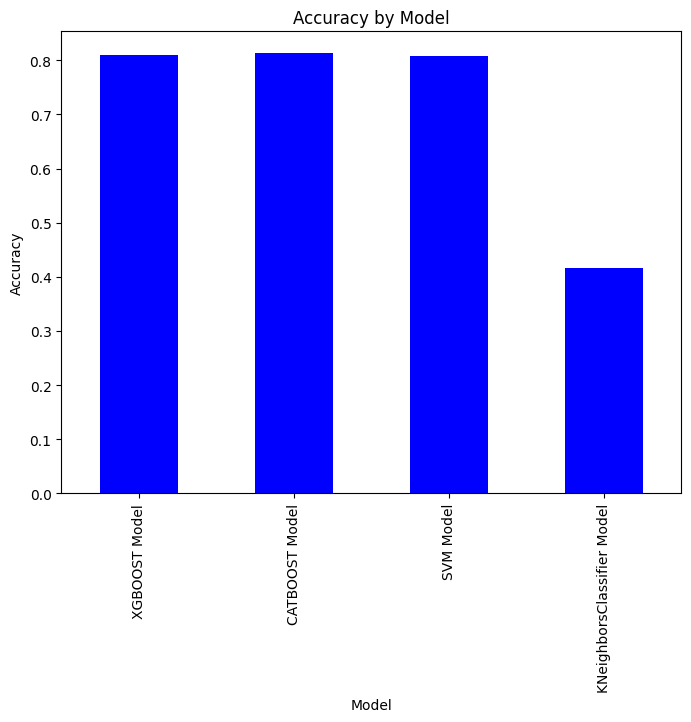

In [26]:
ax = score['Accuracy'].plot(kind='bar', figsize=(8,6), color='blue')
ax.set_title('Accuracy by Model')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
plt.show()


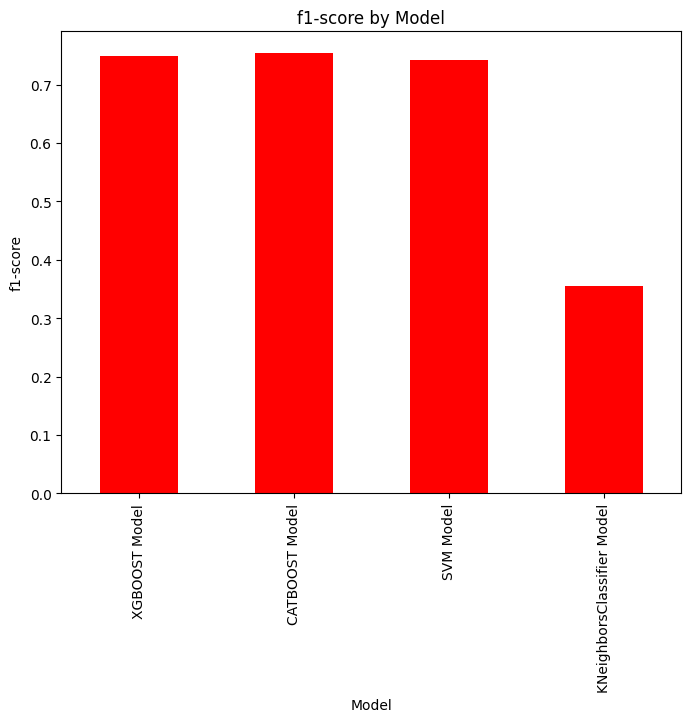

In [27]:
ax = score['F1-Score'].plot(kind='bar', figsize=(8,6), color='red')
ax.set_title('f1-score by Model')
ax.set_xlabel('Model')
ax.set_ylabel('f1-score')
plt.show()
